#### 該文件包含1,338個案例，即目前已經登記過的保險計劃受益者、病人特點和計劃計入的總醫療費用特徵:

* age:表示主要受益者年齡
* sex:性別
* bmi:身體質量指數,理想BMI在18.5~24.9之間
* children:表示保險計劃中所包括的孩子/受撫養者的數量
* smoker:表示被保險人是否經常吸煙
* region:受益者在美國的居住地-東北(northeast), 東南(sotheast), 西南(southwest)和東北(northwest)
* charges:醫療費用

#### 目的:檢測與醫療費用相關之變量，找出在醫療費用上具高風險的人

In [48]:
import pandas as pd

In [49]:
df = pd.read_csv('insurance.csv')

In [50]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
# 兩項
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['smoker'] = le.fit_transform(df['smoker']) # 把 Yes/No 變成 1/0

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [52]:
# one hot encoding -region
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# 2. 初始化 OneHotEncoder
# sparse_output=False：直接給我們數字陣列，不使用稀疏矩陣格式
# handle_unknown='ignore'：未來如果 Flask 收到沒見過的縣市，會自動轉為全 0
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# 3. 讓 Encoder 自動掃描 region 這一欄並進行轉換
# 注意：df[['region']] 必須是雙中括號
encoded_data = encoder.fit_transform(df[['region']])

# 4. 自動抓取「產生的欄位名稱」
# 它會自動產生像 region_taipei, region_taichung 這樣的名稱
column_names = encoder.get_feature_names_out(['region'])

# 5. 把轉換出來的數字轉成 DataFrame
df_encoded_cols = pd.DataFrame(encoded_data, columns=column_names)

# 6. 合併回原始資料表
# axis=1 代表橫向合併 (加在右邊)
df_final = pd.concat([df, df_encoded_cols], axis=1)

# 7. 移除原本的文字欄位 region (因為已經有數字版了)
df_final = df_final.drop('region', axis=1)

print(df_final.head())

   age     sex     bmi  children  smoker      charges  region_northeast  \
0   19  female  27.900         0       1  16884.92400               0.0   
1   18    male  33.770         1       0   1725.55230               0.0   
2   28    male  33.000         3       0   4449.46200               0.0   
3   33    male  22.705         0       0  21984.47061               0.0   
4   32    male  28.880         0       0   3866.85520               0.0   

   region_northwest  region_southeast  region_southwest  
0               0.0               0.0               1.0  
1               0.0               1.0               0.0  
2               0.0               1.0               0.0  
3               1.0               0.0               0.0  
4               1.0               0.0               0.0  


In [53]:
# one hot encoding -sex
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# 2. 初始化 OneHotEncoder
# sparse_output=False：直接給我們數字陣列，不使用稀疏矩陣格式
# handle_unknown='ignore'：未來如果 Flask 收到沒見過的縣市，會自動轉為全 0
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# 3. 讓 Encoder 自動掃描 region 這一欄並進行轉換
# 注意：df[['region']] 必須是雙中括號
encoded_data = encoder.fit_transform(df[['sex']])

# 4. 自動抓取「產生的欄位名稱」
# 它會自動產生像 region_taipei, region_taichung 這樣的名稱
column_names = encoder.get_feature_names_out(['sex'])

# 5. 把轉換出來的數字轉成 DataFrame
df_encoded_cols = pd.DataFrame(encoded_data, columns=column_names)

# 6. 合併回原始資料表
# axis=1 代表橫向合併 (加在右邊)
df_final = pd.concat([df_final, df_encoded_cols], axis=1)

# 7. 移除原本的文字欄位 region (因為已經有數字版了)
df_final = df_final.drop('sex', axis=1)

print(df_final.head())

   age     bmi  children  smoker      charges  region_northeast  \
0   19  27.900         0       1  16884.92400               0.0   
1   18  33.770         1       0   1725.55230               0.0   
2   28  33.000         3       0   4449.46200               0.0   
3   33  22.705         0       0  21984.47061               0.0   
4   32  28.880         0       0   3866.85520               0.0   

   region_northwest  region_southeast  region_southwest  sex_female  sex_male  
0               0.0               0.0               1.0         1.0       0.0  
1               0.0               1.0               0.0         0.0       1.0  
2               0.0               1.0               0.0         0.0       1.0  
3               1.0               0.0               0.0         0.0       1.0  
4               1.0               0.0               0.0         0.0       1.0  


In [54]:
# 標準化
from sklearn import preprocessing
#建立MinMaxScaler物件
minmax = preprocessing.MinMaxScaler()
# 資料標準化
x_minmax = minmax.fit_transform(df_final[['age', 'bmi', 'charges','children' ]]) 
x_minmax= pd.DataFrame(x_minmax, columns=['age', 'bmi', 'charges','children'])

# 直接把轉換後的結果塞回原本的欄位，不會產生重複欄位
df_final[['age', 'bmi', 'charges', 'children']] = minmax.fit_transform(df_final[['age', 'bmi', 'charges', 'children']])

# 這樣 df_final 就已經是更新過的了，不需要 concat 也不需要 drop
df_final.head()


,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,0.021739,0.321227,0.0,1,0.251611,0.0,0.0,0.0,1.0,1.0,0.0
1,0.000000,0.479150,0.2,0,0.009636,0.0,0.0,1.0,0.0,0.0,1.0
2,0.217391,0.458434,0.6,0,0.053115,0.0,0.0,1.0,0.0,0.0,1.0
3,0.326087,0.181464,0.0,0,0.333010,0.0,1.0,0.0,0.0,0.0,1.0
4,0.304348,0.347592,0.0,0,0.043816,0.0,1.0,0.0,0.0,0.0,1.0


In [55]:
# 把charges欄位調到最後面
# 把 charges 彈出來，再塞回最後一欄
df_final['charges'] = df_final.pop('charges')

print(df_final.head())
df_final.info()

        age       bmi  children  smoker  region_northeast  region_northwest  \
0  0.021739  0.321227       0.0       1               0.0               0.0   
1  0.000000  0.479150       0.2       0               0.0               0.0   
2  0.217391  0.458434       0.6       0               0.0               0.0   
3  0.326087  0.181464       0.0       0               0.0               1.0   
4  0.304348  0.347592       0.0       0               0.0               1.0   

   region_southeast  region_southwest  sex_female  sex_male   charges  
0               0.0               1.0         1.0       0.0  0.251611  
1               1.0               0.0         0.0       1.0  0.009636  
2               1.0               0.0         0.0       1.0  0.053115  
3               0.0               0.0         0.0       1.0  0.333010  
4               0.0               0.0         0.0       1.0  0.043816  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total

In [56]:
# 設置標籤
X = df_final.iloc[:, 0:10].values
y = df_final.iloc[:, 10].values.reshape(-1,1)

In [57]:
# 分割訓練和測試
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

print(f"Shape of X_train:{X_train.shape}")
print(f"Shape of X_test:{X_test.shape}")
print(f"Shape of y_train:{y_train.shape}")
print(f"Shape of y_test{y_test.shape}")

Shape of X_train:(936, 10)
Shape of X_test:(402, 10)
Shape of y_train:(936, 1)
Shape of y_test(402, 1)


In [58]:
# 確認是否有NA'
df_final.isnull().sum()

age                 0
bmi                 0
children            0
smoker              0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
sex_female          0
sex_male            0
charges             0
dtype: int64

In [59]:
# 基礎統計量
df_final.describe()

,age,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.395572,0.218984,0.204783,0.242152,0.242900,0.272048,0.242900,0.494768,0.505232,0.193916
std,0.305434,0.164062,0.241099,0.403694,0.428546,0.428995,0.445181,0.428995,0.500160,0.500160,0.193301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.278080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.057757
50%,0.456522,0.388485,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.131849
75%,0.717391,0.504002,0.400000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.247700
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
# 以保險費排序
df_final.sort_values(by=['charges'], ascending=False)

,age,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,charges
543,0.782609,0.846112,0.0,1,0.0,0.0,1.0,0.0,1.0,0.0,1.000000
1300,0.586957,0.387409,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.981204
1230,0.739130,0.498386,0.6,1,0.0,1.0,0.0,0.0,0.0,1.0,0.940158
577,0.282609,0.595507,0.2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.917008
819,0.326087,0.526500,0.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.862167
...,...,...,...,...,...,...,...,...,...,...,...
22,0.000000,0.488028,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.000242
663,0.000000,0.476190,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.000232
1244,0.000000,0.467312,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.000225
808,0.000000,0.381490,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.000154


In [61]:
# 欄位名
df_final.columns

Index(['age', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest',
       'sex_female', 'sex_male', 'charges'],
      dtype='object')

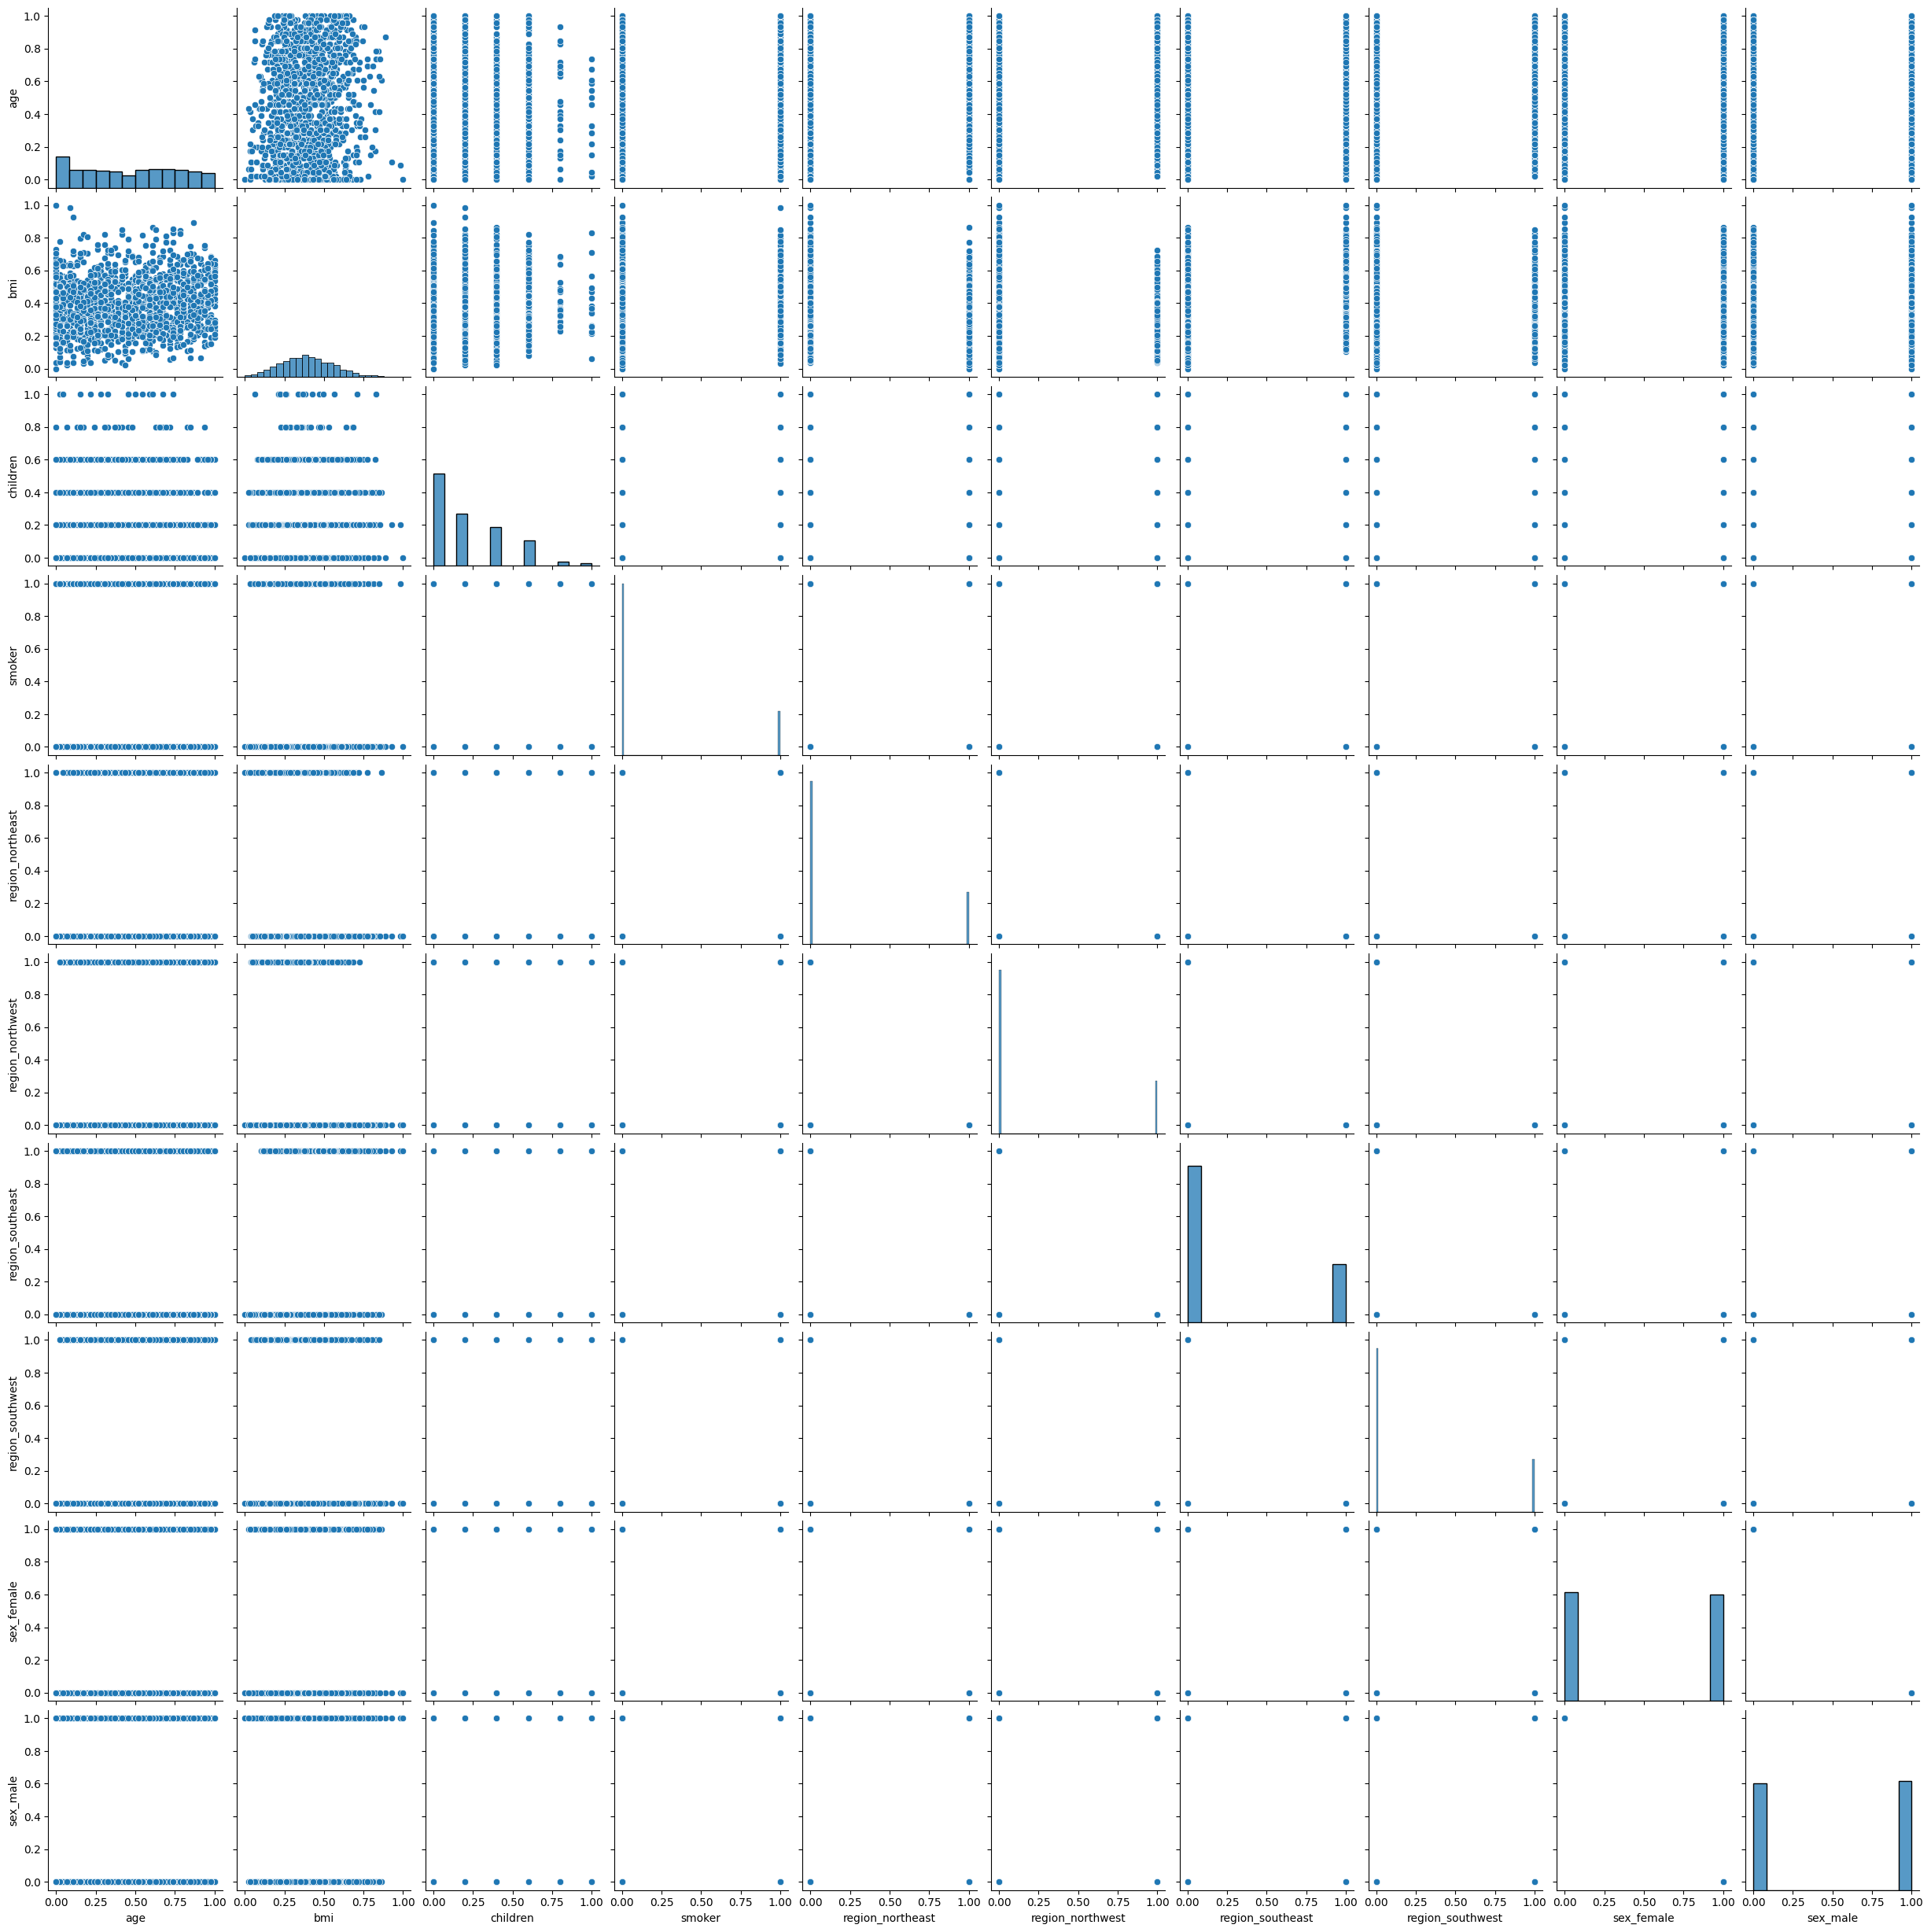

In [62]:
# X與X的關係圖
import seaborn as sns
import matplotlib.pyplot as plt  # 建議連這個也一起帶上，因為 seaborn 是建立在它之上的
sns.pairplot(df_final[['age', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest',
       'sex_female', 'sex_male']])

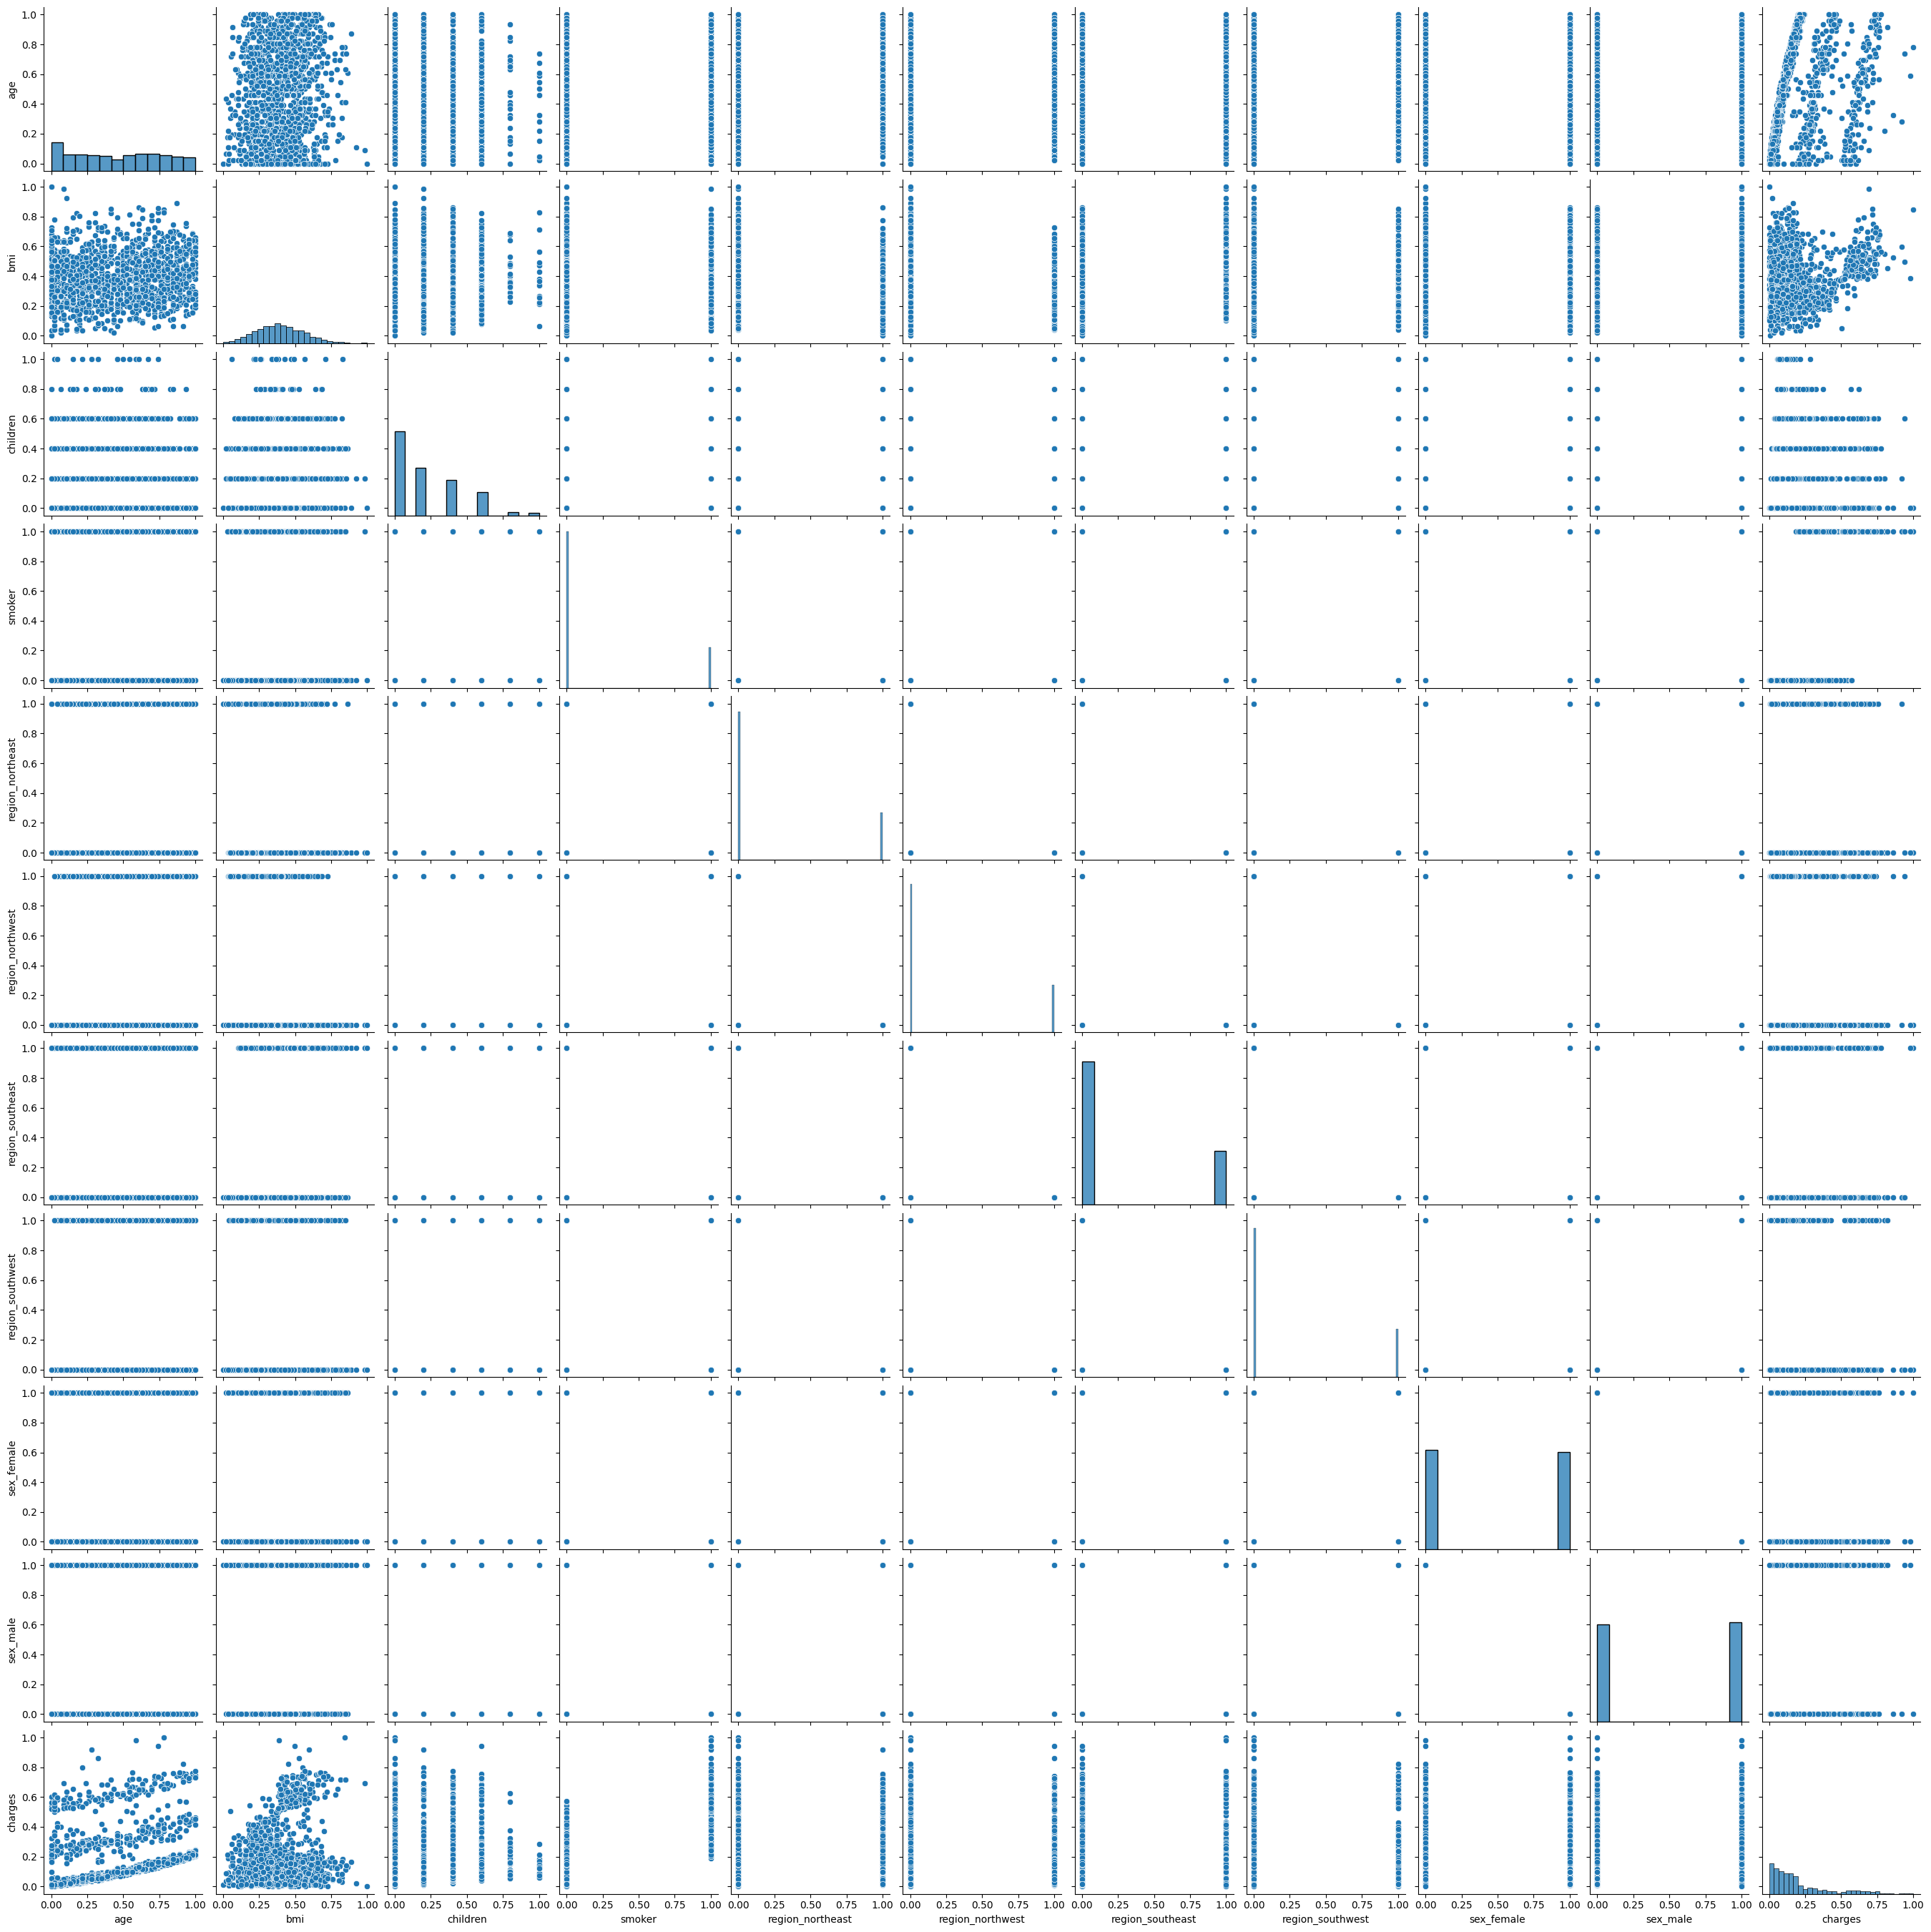

In [63]:
# X與Y的關係圖
import seaborn as sns
import matplotlib.pyplot as plt  # 建議連這個也一起帶上，因為 seaborn 是建立在它之上的
sns.pairplot(df_final[['age', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest',
       'sex_female', 'sex_male', 'charges']])

<Axes: >

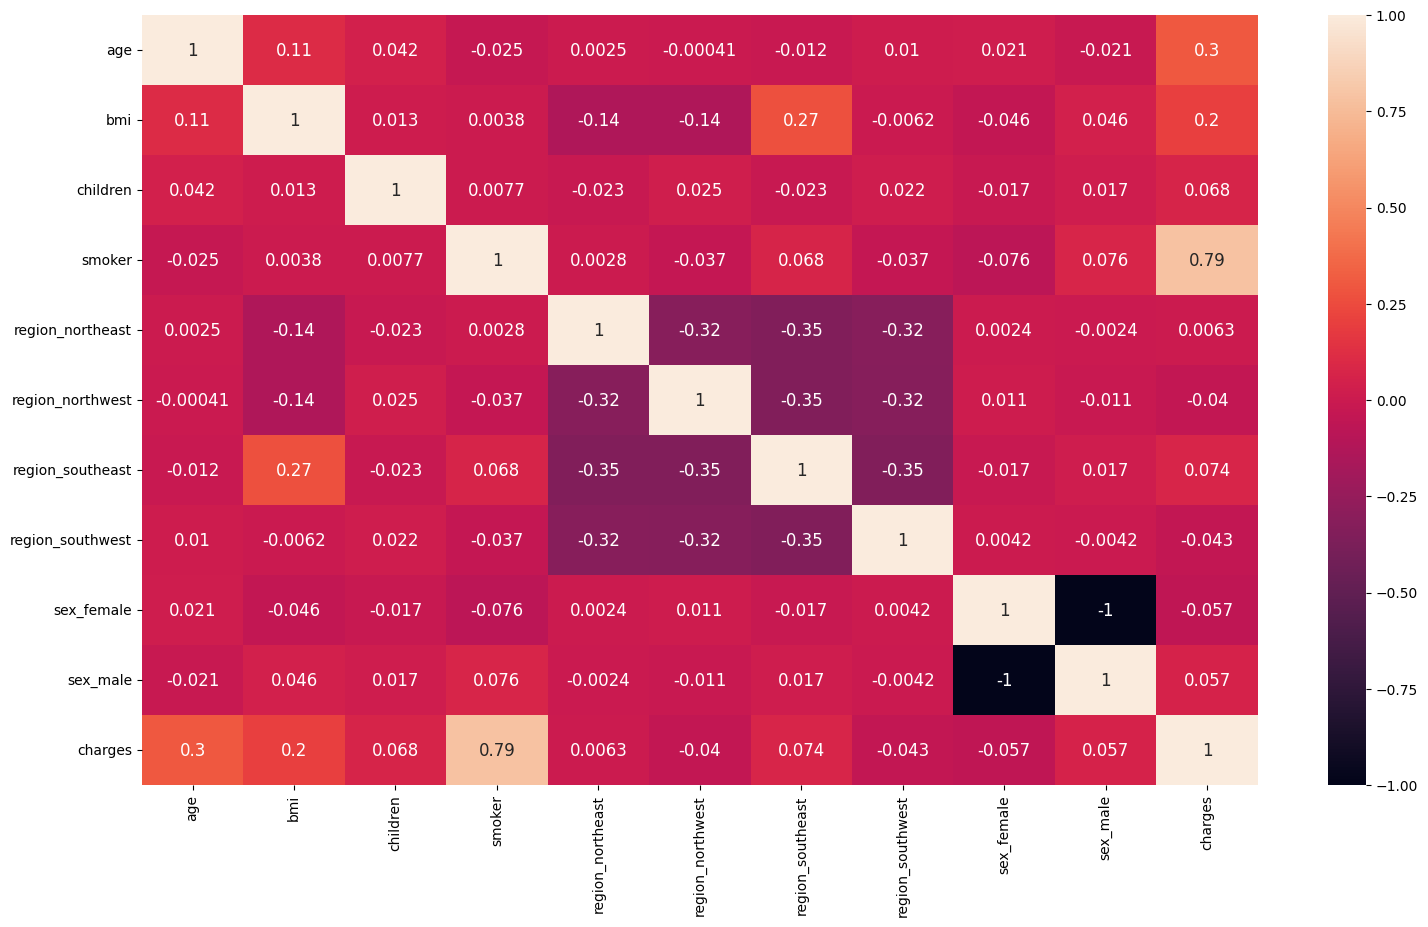

In [64]:
# 各變數的關係數字(-1(負相關) 0 1(正相關))
corrmat = df_final.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})